# Bitcoin USD (BTC-USD) Data Analysis

In this analysis, I will be predicting the closing price for Bitcoin. Bitcoin is a form of cryptocurrency that has been introduced in 2009. So far, digital currency has been around for a while. This analysis will analyze the trends of the digital currency popularity. Bitcoins are known to always spike as this prediction could also result in Bitcoin always spiking to where a resonalbe prediction could be possible or vice versa. The following packages will be utilized for this analysis.

- Pandas: Used for importing csv files to be used for datasets.
- Matplotlib: Used for plotting our graph for data visualization.
- Fbprophet: Time-Series Forecasting used for prediction.

Importing Packages

In [4]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet

Importing Dataset

In [17]:
crypto = pandas.read_csv('BTC.csv')
crypto

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2059,2020-05-07,9261.895508,9992.664063,9138.322266,9951.518555,9951.518555,6.111270e+10
2060,2020-05-08,9936.162109,9996.743164,9767.172852,9842.666016,9842.666016,5.178075e+10
2061,2020-05-09,9840.906250,9913.863281,9580.644531,9593.896484,9593.896484,4.656612e+10
2062,2020-05-10,NaN,NaN,NaN,NaN,NaN,NaN


Bitcoin Dataset Visualization

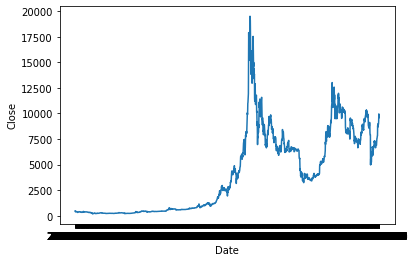

In [19]:
plt.plot(crypto.Date,crypto.Close)
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

# Predicting Bitcoin's Closing Market Value

In [31]:
btn = fbprophet.Prophet()

In [42]:
df = crypto

In [43]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2059,2020-05-07,9261.895508,9992.664063,9138.322266,9951.518555,9951.518555,6.111270e+10
2060,2020-05-08,9936.162109,9996.743164,9767.172852,9842.666016,9842.666016,5.178075e+10
2061,2020-05-09,9840.906250,9913.863281,9580.644531,9593.896484,9593.896484,4.656612e+10
2062,2020-05-10,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df[['ds','y']] = df[['Date','Close']]
df = df[['ds','y']]
df

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
2059,2020-05-07,9951.518555
2060,2020-05-08,9842.666016
2061,2020-05-09,9593.896484
2062,2020-05-10,NaN


In [46]:
btn.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Future DataFrame

In [47]:
future = btn.make_future_dataframe(periods=365)
future.tail()

,ds
2424,2021-05-07
2425,2021-05-08
2426,2021-05-09
2427,2021-05-10
2428,2021-05-11


Future Closing Prices for Bitcoin in 2021

In [50]:
predict = btn.predict(future)
predict.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2424,2021-05-07,12812.610188,6394.558384,19358.904526,6478.788936,19146.460190,-9.118396,-9.118396,-9.118396,1.063141,1.063141,1.063141,-10.181537,-10.181537,-10.181537,0.0,0.0,0.0,12803.491791
2425,2021-05-08,12820.942145,6299.519602,19395.189099,6467.305921,19183.212100,46.795301,46.795301,46.795301,9.548837,9.548837,9.548837,37.246464,37.246464,37.246464,0.0,0.0,0.0,12867.737447
2426,2021-05-09,12829.274103,6088.694496,19696.433100,6448.144982,19219.964009,78.965422,78.965422,78.965422,-2.841006,-2.841006,-2.841006,81.806429,81.806429,81.806429,0.0,0.0,0.0,12908.239526
2427,2021-05-10,12837.606061,6621.051080,19707.086300,6421.577306,19256.715919,127.500340,127.500340,127.500340,4.436800,4.436800,4.436800,123.063540,123.063540,123.063540,0.0,0.0,0.0,12965.106402
2428,2021-05-11,12845.938019,6484.744870,19856.152726,6388.733598,19293.467828,162.855975,162.855975,162.855975,2.211174,2.211174,2.211174,160.644801,160.644801,160.644801,0.0,0.0,0.0,13008.793994


Prediction Visualization for Dataset Visual and Seasonality 

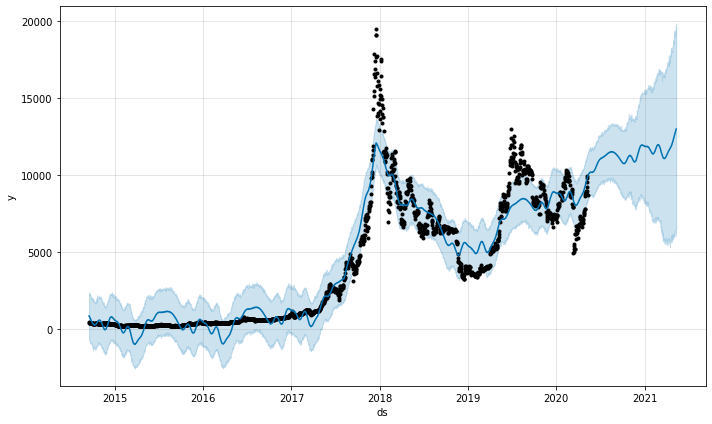

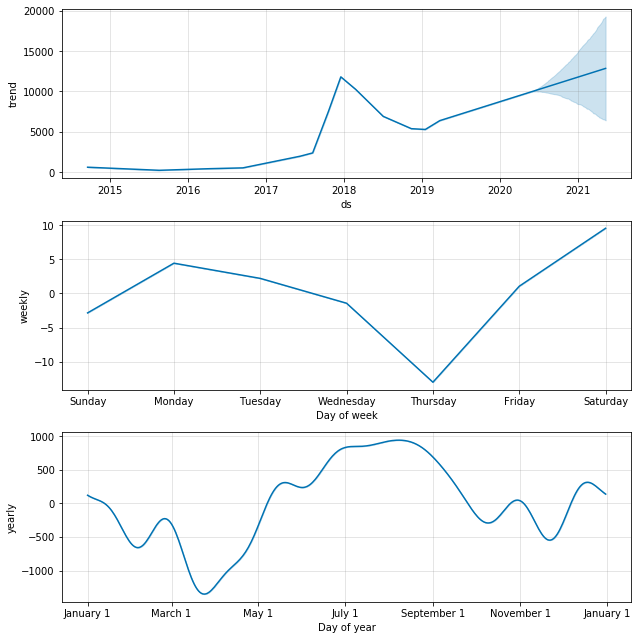

In [55]:
btn.plot(predict);
btn.plot_components(predict);

Description of the Prediction Dataset 

In [56]:
predict.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2.429000e+03,2.429000e+03,2.429000e+03,2429.000000,2429.000000,2429.000000,2429.0,2429.0,2429.0,2429.000000
mean,5171.155150,3372.613416,6897.361379,4789.912716,5539.243428,-34.265161,-34.265161,-34.265161,-7.256114e-14,-7.256114e-14,-7.256114e-14,-34.265161,-34.265161,-34.265161,0.0,0.0,0.0,5136.889988
std,4310.077805,3996.879469,4747.009301,3843.976959,4995.640842,608.016953,608.016953,608.016953,6.501857e+00,6.501857e+00,6.501857e+00,607.982690,607.982690,607.982690,0.0,0.0,0.0,4303.392650
min,206.782856,-2555.530764,469.619860,206.782856,206.782856,-1363.815412,-1363.815412,-1363.815412,-1.299255e+01,-1.299255e+01,-1.299255e+01,-1351.022166,-1351.022166,-1351.022166,0.0,0.0,0.0,-986.651005
25%,486.527052,-809.077175,2211.506488,486.527052,486.527052,-442.283108,-442.283108,-442.283108,-2.841006e+00,-2.841006e+00,-2.841006e+00,-440.850877,-440.850877,-440.850877,0.0,0.0,0.0,699.976868
50%,5638.886899,3923.821654,6953.464922,5638.886899,5638.886899,-18.269050,-18.269050,-18.269050,1.063141e+00,1.063141e+00,1.063141e+00,-17.880421,-17.880421,-17.880421,0.0,0.0,0.0,5450.472088
75%,9063.229114,6860.294831,10045.191716,8371.676605,9063.229114,315.784473,315.784473,315.784473,4.436800e+00,4.436800e+00,4.436800e+00,313.866678,313.866678,313.866678,0.0,0.0,0.0,8523.308824
max,12845.938019,10698.442186,19856.152726,11794.747893,19293.467828,952.065773,952.065773,952.065773,9.548837e+00,9.548837e+00,9.548837e+00,942.518815,942.518815,942.518815,0.0,0.0,0.0,13008.793994


# Conclusion

Based on the Visual description of Bitcoin, it seems that Fbprophet's time-series forecasting package tends to trend upward. I believe the digital currency is going to potentially get stronger with years to come. Bitcoin's predicted closing price in 2021 is at $13,000 to the USD. Bitcoin is popular, but it has problems with investors finding it risky to invest in digital money whereas ordinary investors would want to inject cash flow into equity stocks with options that would change the economic outlook. Overall, my analysis stands that Bitcoin is going to increase because the fact that it is crypto and it can go in an upward projection. Furthermore, The seasonality prospects, trend and yearly gains, are fluctuating overtime according to the predictive analysis from Fbprophet. 